In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import pandas as pd
import torch.nn as nn

from utils.dataloader  import FaceDataset, preprocess, postprocess
from utils.learning import testing, training, scores
from utils.utils_data import train_validation_test_split
from utils.visiualisation import display_graph_learning, grid_image_data_set, display_matrix_coffusion
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from models.vgg import CustomVGGPytorch
from tqdm import tqdm

torch.cuda.empty_cache()

In [2]:
faceDataset_range04 = FaceDataset(preprocess(), is_group_network=True, group_rng=0)
print(f'Taille du dataset: {len(faceDataset_range04)}')

Taille du dataset: 43266


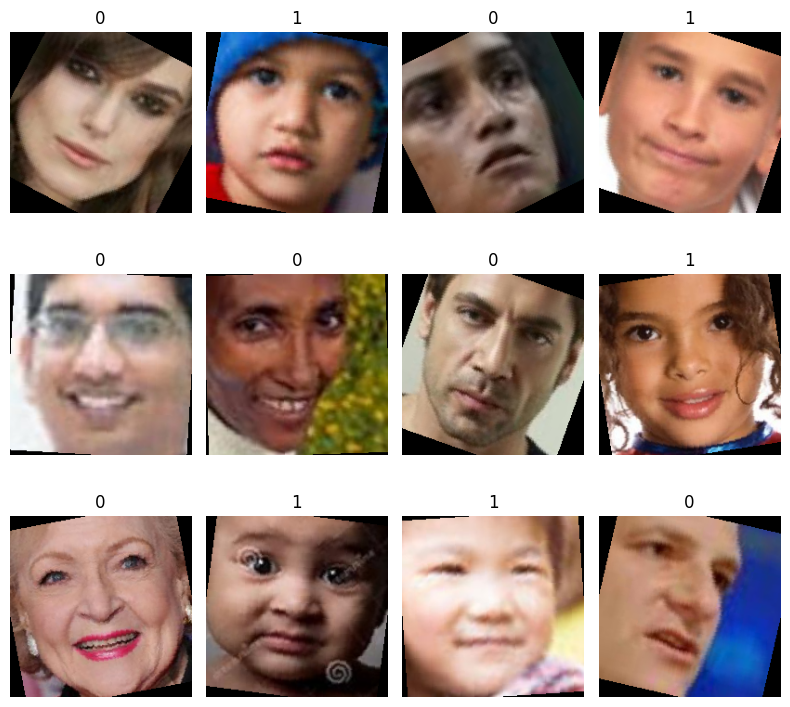

In [3]:
fig, ax = plt.subplots(3, 4, tight_layout=True, figsize=(8, 8))

label_names = faceDataset_range04.get_all_age_range()

for i in range(3):
    for j in range(4):
        rand_idx = np.random.randint(0, len(faceDataset_range04))
        img, label = faceDataset_range04[rand_idx]
        postprocess_apply = postprocess()
        ax[i,j].imshow(postprocess_apply(img))
        ax[i,j].set_title(label)
        ax[i,j].set_axis_off()

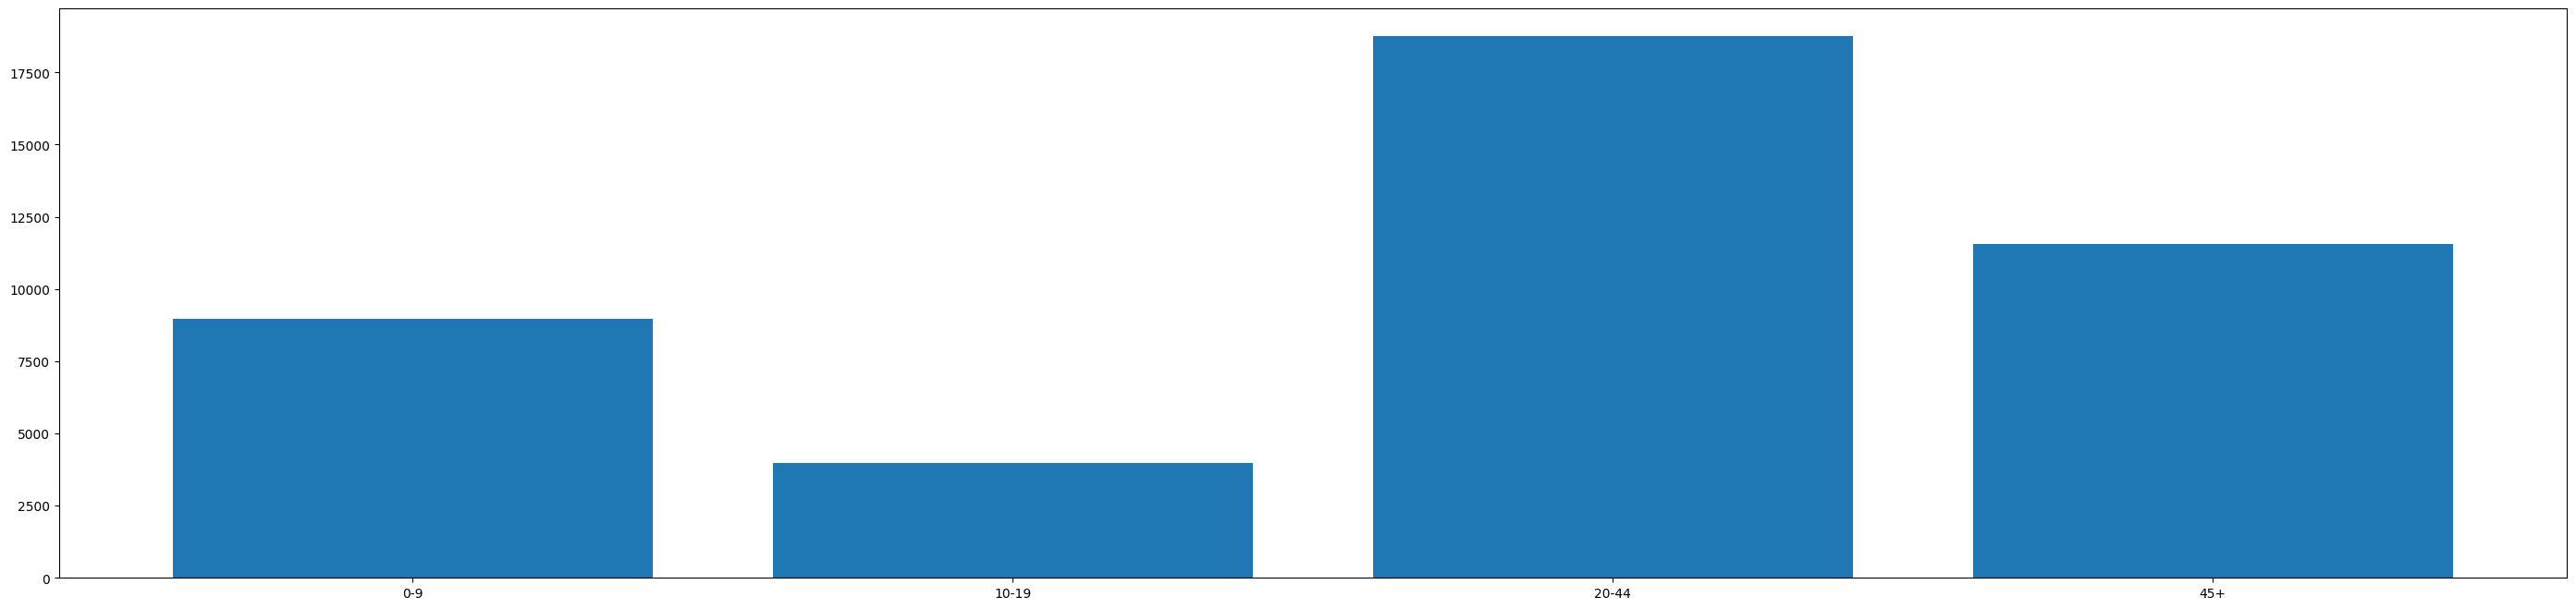

In [4]:
img_by_age_range = faceDataset_range04.img_labels.groupby(['age_range_extended'])['age_range_extended']
df = img_by_age_range.count()

label_names = faceDataset_range04.get_all_age_range_extended()

fig, ax = plt.subplots(figsize=(35, 8))
bar_container = ax.bar(label_names.values(), df.values)

## Entrainement

Nous allons entrainer notre un model pour chaque groupe d'age

## Classifier 0 - 9

In [5]:
faceDataset_range09 = FaceDataset(preprocess(), is_group_network=True, group_rng=0)

### Split dataset train, validation et test

In [6]:
train_sampler, validation_sampler, test_sampler = train_validation_test_split(faceDataset_range09, validation_size=0.2, test_size=0.2)

#### Entrainement

In [7]:
# make training
# save model
batch_size=128
learning_rate=1e-4

criterion = nn.BCELoss()

 
model = CustomVGGPytorch()

optimizer = Adam(params=model.parameters(), lr=learning_rate)


train_loader = DataLoader(faceDataset_range09, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(faceDataset_range09, batch_size=batch_size, sampler=validation_sampler)
test_loader = DataLoader(faceDataset_range09, batch_size=batch_size, sampler=test_sampler)

model, hist_train_loss, hist_val_loss, _ = training(model, 30, criterion=criterion, optimizer=optimizer, is_classification=True, is_binary=True, train_loader=train_loader, validation_loader=validation_loader, patient=4, do_save=True, DEVICE='cuda', file_name='custom_vgg_09')

Training process epoch 1/30


100%|██████████| 217/217 [02:32<00:00,  1.43it/s]


Test process 1/30


100%|██████████| 55/55 [00:26<00:00,  2.08it/s]


[-] epoch 1/30, train loss 0.285612, valiation loss 0.148150, socres => Accuracy:0.9438023692574401, F1-Score0.8542525290370926
 
[-] epoch 1/30, train loss 0.285612
 
Training process epoch 2/30


100%|██████████| 217/217 [02:12<00:00,  1.63it/s]


Test process 2/30


100%|██████████| 55/55 [00:22<00:00,  2.43it/s]


[-] epoch 2/30, train loss 0.130691, valiation loss 0.118066, socres => Accuracy:0.9559375902918231, F1-Score0.8915748311411306
 
[-] epoch 2/30, train loss 0.130691
 
Training process epoch 3/30


100%|██████████| 217/217 [02:07<00:00,  1.71it/s]


Test process 3/30


100%|██████████| 55/55 [00:20<00:00,  2.65it/s]


[-] epoch 3/30, train loss 0.105532, valiation loss 0.132957, socres => Accuracy:0.9518925166136954, F1-Score0.8905685179099573
 
[-] epoch 3/30, train loss 0.105532
 
Training process epoch 4/30


100%|██████████| 217/217 [02:03<00:00,  1.75it/s]


Test process 4/30


100%|██████████| 55/55 [00:20<00:00,  2.62it/s]


[-] epoch 4/30, train loss 0.102919, valiation loss 0.098199, socres => Accuracy:0.9641722045651546, F1-Score0.9118692253020612
 
[-] epoch 4/30, train loss 0.102919
 
Training process epoch 5/30


100%|██████████| 217/217 [02:03<00:00,  1.76it/s]


Test process 5/30


100%|██████████| 55/55 [00:20<00:00,  2.68it/s]


[-] epoch 5/30, train loss 0.092685, valiation loss 0.094609, socres => Accuracy:0.9637388038139266, F1-Score0.9119607155384076
 
[-] epoch 5/30, train loss 0.092685
 
Training process epoch 6/30


100%|██████████| 217/217 [02:02<00:00,  1.78it/s]


Test process 6/30


100%|██████████| 55/55 [00:20<00:00,  2.65it/s]


[-] epoch 6/30, train loss 0.084825, valiation loss 0.087142, socres => Accuracy:0.9680728113262063, F1-Score0.9226461323066154
 
[-] epoch 6/30, train loss 0.084825
 
Training process epoch 7/30


100%|██████████| 217/217 [02:02<00:00,  1.77it/s]


Test process 7/30


100%|██████████| 55/55 [00:20<00:00,  2.70it/s]


[-] epoch 7/30, train loss 0.078456, valiation loss 0.084787, socres => Accuracy:0.9683617451603582, F1-Score0.9255355321319279
 
[-] epoch 7/30, train loss 0.078456
 
Training process epoch 8/30


100%|██████████| 217/217 [02:04<00:00,  1.74it/s]


Test process 8/30


100%|██████████| 55/55 [00:19<00:00,  2.79it/s]


[-] epoch 8/30, train loss 0.070326, valiation loss 0.080745, socres => Accuracy:0.9683617451603582, F1-Score0.9260385005065856
 
[-] epoch 8/30, train loss 0.070326
 
Training process epoch 9/30


100%|██████████| 217/217 [01:55<00:00,  1.87it/s]


Test process 9/30


100%|██████████| 55/55 [00:19<00:00,  2.77it/s]


[-] epoch 9/30, train loss 0.068013, valiation loss 0.079577, socres => Accuracy:0.9706732158335741, F1-Score0.9289464473223661
 
[-] epoch 9/30, train loss 0.068013
 
Training process epoch 10/30


100%|██████████| 217/217 [01:55<00:00,  1.88it/s]


Test process 10/30


100%|██████████| 55/55 [00:19<00:00,  2.77it/s]


[-] epoch 10/30, train loss 0.063103, valiation loss 0.086659, socres => Accuracy:0.9709621496677261, F1-Score0.9317950458092976
 
[-] epoch 10/30, train loss 0.063103
 
Training process epoch 11/30


100%|██████████| 217/217 [01:55<00:00,  1.87it/s]


Test process 11/30


100%|██████████| 55/55 [00:19<00:00,  2.78it/s]


[-] epoch 11/30, train loss 0.059815, valiation loss 0.071154, socres => Accuracy:0.9742848887604738, F1-Score0.9383229383229383
 
[-] epoch 11/30, train loss 0.059815
 
Training process epoch 12/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 12/30


100%|██████████| 55/55 [00:19<00:00,  2.78it/s]


[-] epoch 12/30, train loss 0.053790, valiation loss 0.081188, socres => Accuracy:0.973129153423866, F1-Score0.9346451159522137
 
[-] epoch 12/30, train loss 0.053790
 
Training process epoch 13/30


100%|██████████| 217/217 [01:56<00:00,  1.87it/s]


Test process 13/30


100%|██████████| 55/55 [00:20<00:00,  2.68it/s]


[-] epoch 13/30, train loss 0.052813, valiation loss 0.088483, socres => Accuracy:0.9729846865067899, F1-Score0.9370582295523393
 
[-] epoch 13/30, train loss 0.052813
 
Training process epoch 14/30


100%|██████████| 217/217 [01:57<00:00,  1.85it/s]


Test process 14/30


100%|██████████| 55/55 [00:19<00:00,  2.76it/s]


[-] epoch 14/30, train loss 0.049873, valiation loss 0.074117, socres => Accuracy:0.9737070210921699, F1-Score0.9391304347826087
 
[-] epoch 14/30, train loss 0.049873
 
Training process epoch 15/30


100%|██████████| 217/217 [01:55<00:00,  1.88it/s]


Test process 15/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 15/30, train loss 0.044261, valiation loss 0.057992, socres => Accuracy:0.9787633631898295, F1-Score0.9487983281086728
 
[-] epoch 15/30, train loss 0.044261
 
Training process epoch 16/30


100%|██████████| 217/217 [01:55<00:00,  1.89it/s]


Test process 16/30


100%|██████████| 55/55 [00:20<00:00,  2.67it/s]


[-] epoch 16/30, train loss 0.042907, valiation loss 0.062357, socres => Accuracy:0.9774631609361456, F1-Score0.9469387755102041
 
[-] epoch 16/30, train loss 0.042907
 
Training process epoch 17/30


100%|██████████| 217/217 [01:55<00:00,  1.88it/s]


Test process 17/30


100%|██████████| 55/55 [00:19<00:00,  2.75it/s]


[-] epoch 17/30, train loss 0.040717, valiation loss 0.070031, socres => Accuracy:0.9777520947702976, F1-Score0.9460028050490883
 
[-] epoch 17/30, train loss 0.040717
 
Training process epoch 18/30


100%|██████████| 217/217 [01:55<00:00,  1.88it/s]


Test process 18/30


100%|██████████| 55/55 [00:20<00:00,  2.74it/s]


[-] epoch 18/30, train loss 0.040497, valiation loss 0.062316, socres => Accuracy:0.9784744293556775, F1-Score0.9494401085850017
 
[-] epoch 18/30, train loss 0.040497
 
Training process epoch 19/30


100%|██████████| 217/217 [01:55<00:00,  1.88it/s]


Test process 19/30


100%|██████████| 55/55 [00:19<00:00,  2.80it/s]


[-] epoch 19/30, train loss 0.035352, valiation loss 0.065713, socres => Accuracy:0.9752961571800057, F1-Score0.9387316374059477
 
[-] epoch 19/30, train loss 0.035352
 
Training process epoch 20/30


100%|██████████| 217/217 [01:55<00:00,  1.89it/s]


Test process 20/30


100%|██████████| 55/55 [00:20<00:00,  2.69it/s]


[-] epoch 20/30, train loss 0.031904, valiation loss 0.099343, socres => Accuracy:0.9677838774920543, F1-Score0.9179845531445385
 
[-] epoch 20/30, train loss 0.031904
 


#### Test

In [8]:
# make test
results09, y_pred, y_true = testing(model=model, criterion=criterion, is_binary=True, test_validation=test_loader, DEVICE='cuda')

Test: 100%|██████████| 68/68 [00:29<00:00,  2.33it/s]

[-] Test loss 0.090420


#### Display result and discussion  

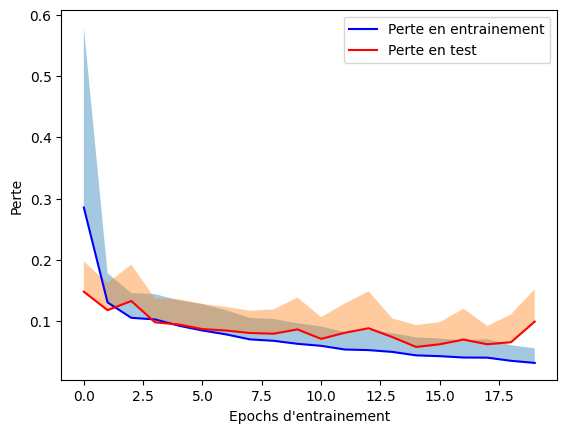

In [9]:
# visualization of result and discution
display_graph_learning(hist_train_loss[:, 0], hist_val_loss[:, 0], hist_train_loss[:, 1], hist_val_loss[:, 1], "")

In [10]:
matrix, all_score, roc_plot = scores(y_true, y_pred)
all_score

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,0.986965,0.028661,0.927655,0.875069,0.971339,0.935998


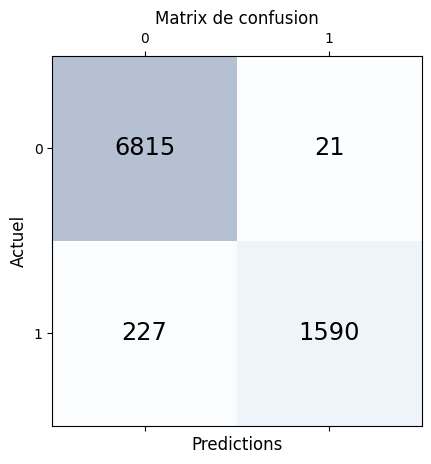

In [11]:
display_matrix_coffusion(matrix)

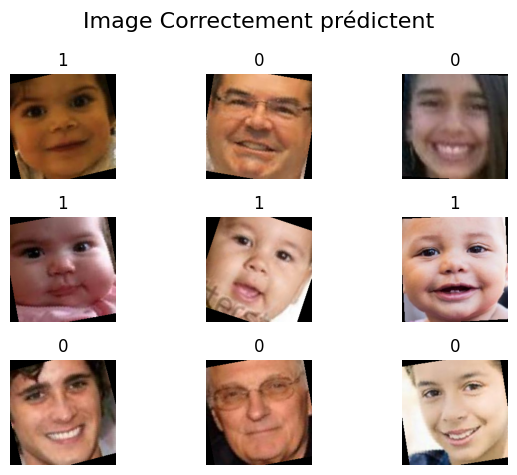

In [12]:
if len(results09['images_correct']) >= 9:
    grid_image_data_set(results09['images_correct'][:9], results09['label_correct'][:9], "Image Correctement prédictent")

In [39]:
if len(results09['images_incorrect']) >= 9:
    grid_image_data_set(results09['images_incorrect'][:9], results09['label_incorrect'][:9], "Image Incorrectement prédictent")

ValueError: Number of rows must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

## Classifier 10 - 19

In [14]:
faceDataset_range1019 = FaceDataset(preprocess(), is_group_network=True, group_rng=1)

### Split dataset train, validation et test

In [15]:
train_sampler, validation_sampler, test_sampler = train_validation_test_split(faceDataset_range1019, validation_size=0.2, test_size=0.2)

#### Entrainement

In [16]:
# make training
# save model
# make training
# save model
batch_size=128
learning_rate=1e-4

criterion = nn.BCELoss()

 
model = CustomVGGPytorch()

optimizer = Adam(params=model.parameters(), lr=learning_rate)


train_loader = DataLoader(faceDataset_range1019, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(faceDataset_range1019, batch_size=batch_size, sampler=validation_sampler)
test_loader = DataLoader(faceDataset_range1019, batch_size=batch_size, sampler=test_sampler)

model, hist_train_loss, hist_val_loss, _ = training(model, 30, criterion=criterion, optimizer=optimizer, train_loader=train_loader, is_classification=True, is_binary=True, validation_loader=validation_loader, patient=4, do_save=True, DEVICE='cuda', file_name='custom_vgg_1019')

Training process epoch 1/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 1/30


100%|██████████| 55/55 [00:19<00:00,  2.89it/s]


[-] epoch 1/30, train loss 0.430912, valiation loss 0.293091, socres => Accuracy:0.9102860444958104, F1-Score0.09343065693430656
 
[-] epoch 1/30, train loss 0.430912
 
Training process epoch 2/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 2/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 2/30, train loss 0.270986, valiation loss 0.254426, socres => Accuracy:0.9151979196763941, F1-Score0.25222929936305727
 
[-] epoch 2/30, train loss 0.270986
 
Training process epoch 3/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 3/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 3/30, train loss 0.248403, valiation loss 0.283416, socres => Accuracy:0.9112973129153424, F1-Score0.09439528023598821
 
[-] epoch 3/30, train loss 0.248403
 
Training process epoch 4/30


100%|██████████| 217/217 [01:58<00:00,  1.83it/s]


Test process 4/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 4/30, train loss 0.228142, valiation loss 0.220323, socres => Accuracy:0.9192429933545219, F1-Score0.38368246968026465
 
[-] epoch 4/30, train loss 0.228142
 
Training process epoch 5/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 5/30


100%|██████████| 55/55 [00:18<00:00,  2.91it/s]


[-] epoch 5/30, train loss 0.208518, valiation loss 0.224570, socres => Accuracy:0.9192429933545219, F1-Score0.29508196721311475
 
[-] epoch 5/30, train loss 0.208518
 
Training process epoch 6/30


100%|██████████| 217/217 [01:53<00:00,  1.92it/s]


Test process 6/30


100%|██████████| 55/55 [00:18<00:00,  2.90it/s]


[-] epoch 6/30, train loss 0.199383, valiation loss 0.203285, socres => Accuracy:0.9229991331984976, F1-Score0.3722025912838634
 
[-] epoch 6/30, train loss 0.199383
 
Training process epoch 7/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 7/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 7/30, train loss 0.190504, valiation loss 0.201623, socres => Accuracy:0.9225657324472696, F1-Score0.39366515837104066
 
[-] epoch 7/30, train loss 0.190504
 
Training process epoch 8/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 8/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 8/30, train loss 0.178880, valiation loss 0.183960, socres => Accuracy:0.930655879803525, F1-Score0.49473684210526314
 
[-] epoch 8/30, train loss 0.178880
 
Training process epoch 9/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 9/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 9/30, train loss 0.175499, valiation loss 0.179643, socres => Accuracy:0.930655879803525, F1-Score0.5275590551181103
 
[-] epoch 9/30, train loss 0.175499
 
Training process epoch 10/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 10/30


100%|██████████| 55/55 [00:18<00:00,  2.91it/s]


[-] epoch 10/30, train loss 0.165022, valiation loss 0.182590, socres => Accuracy:0.930366945969373, F1-Score0.5801393728222998
 
[-] epoch 10/30, train loss 0.165022
 
Training process epoch 11/30


100%|██████████| 217/217 [01:53<00:00,  1.92it/s]


Test process 11/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 11/30, train loss 0.153309, valiation loss 0.177647, socres => Accuracy:0.929355677549841, F1-Score0.6134387351778656
 
[-] epoch 11/30, train loss 0.153309
 
Training process epoch 12/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 12/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 12/30, train loss 0.146982, valiation loss 0.171223, socres => Accuracy:0.930366945969373, F1-Score0.6234375
 
[-] epoch 12/30, train loss 0.146982
 
Training process epoch 13/30


100%|██████████| 217/217 [01:53<00:00,  1.92it/s]


Test process 13/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 13/30, train loss 0.142364, valiation loss 0.198775, socres => Accuracy:0.9331118173938168, F1-Score0.46225319396051107
 
[-] epoch 13/30, train loss 0.142364
 
Training process epoch 14/30


100%|██████████| 217/217 [01:58<00:00,  1.83it/s]


Test process 14/30


100%|██████████| 55/55 [00:22<00:00,  2.40it/s]


[-] epoch 14/30, train loss 0.134309, valiation loss 0.146735, socres => Accuracy:0.9459693730135799, F1-Score0.6618444846292948
 
[-] epoch 14/30, train loss 0.134309
 
Training process epoch 15/30


100%|██████████| 217/217 [01:59<00:00,  1.81it/s]


Test process 15/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 15/30, train loss 0.123402, valiation loss 0.148762, socres => Accuracy:0.9430800346720601, F1-Score0.6331471135940409
 
[-] epoch 15/30, train loss 0.123402
 
Training process epoch 16/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 16/30


100%|██████████| 55/55 [00:19<00:00,  2.87it/s]


[-] epoch 16/30, train loss 0.113499, valiation loss 0.174598, socres => Accuracy:0.9339786188962728, F1-Score0.6550943396226415
 
[-] epoch 16/30, train loss 0.113499
 
Training process epoch 17/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 17/30


100%|██████████| 55/55 [00:19<00:00,  2.87it/s]


[-] epoch 17/30, train loss 0.111294, valiation loss 0.144101, socres => Accuracy:0.9468361745160359, F1-Score0.676056338028169
 
[-] epoch 17/30, train loss 0.111294
 
Training process epoch 18/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 18/30


100%|██████████| 55/55 [00:19<00:00,  2.84it/s]


[-] epoch 18/30, train loss 0.100507, valiation loss 0.145375, socres => Accuracy:0.9468361745160359, F1-Score0.6833046471600689
 
[-] epoch 18/30, train loss 0.100507
 
Training process epoch 19/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 19/30


100%|██████████| 55/55 [00:18<00:00,  2.90it/s]


[-] epoch 19/30, train loss 0.099472, valiation loss 0.162592, socres => Accuracy:0.9482808436867958, F1-Score0.6510721247563352
 
[-] epoch 19/30, train loss 0.099472
 
Training process epoch 20/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 20/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 20/30, train loss 0.098063, valiation loss 0.146720, socres => Accuracy:0.945102571511124, F1-Score0.7129909365558913
 
[-] epoch 20/30, train loss 0.098063
 
Training process epoch 21/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 21/30


100%|██████████| 55/55 [00:19<00:00,  2.87it/s]


[-] epoch 21/30, train loss 0.086323, valiation loss 0.151423, socres => Accuracy:0.9520369835307715, F1-Score0.68796992481203
 
[-] epoch 21/30, train loss 0.086323
 
Training process epoch 22/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 22/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 22/30, train loss 0.082058, valiation loss 0.161559, socres => Accuracy:0.9475585091014158, F1-Score0.72686230248307
 
[-] epoch 22/30, train loss 0.082058
 


#### Test

In [17]:
# make test
results1019, y, y_true = testing(model=model, criterion=criterion, is_binary=True, test_validation=test_loader, DEVICE='cuda')

Test: 100%|██████████| 68/68 [00:27<00:00,  2.51it/s]

[-] Test loss 0.150794


#### Display result and discussion  

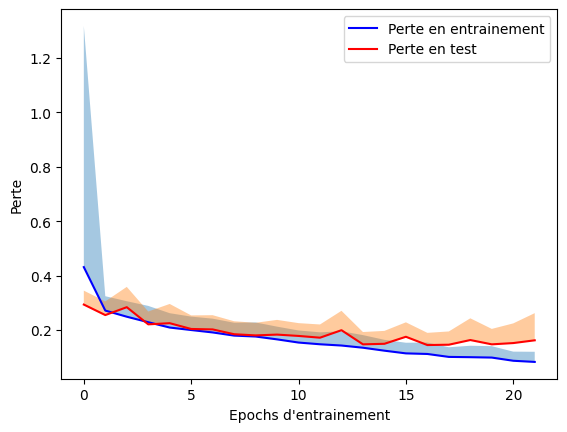

In [18]:
# visualization of result and discution
display_graph_learning(hist_train_loss[:, 0], hist_val_loss[:, 0], hist_train_loss[:, 1], hist_val_loss[:, 1], "")

In [19]:
matrix, all_score, roc_plot = scores(y_true, y)
all_score

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,0.717949,0.049809,0.74083,0.765217,0.950191,0.867191


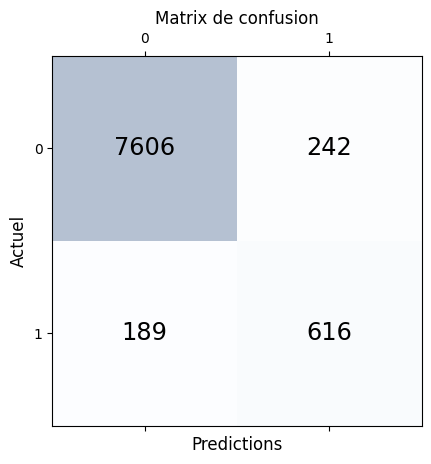

In [20]:
display_matrix_coffusion(matrix)

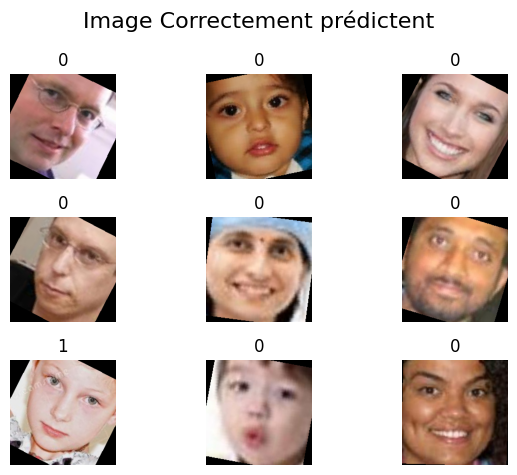

In [21]:
if len(results1019['images_correct']) >= 9:
    grid_image_data_set(results1019['images_correct'][:9], results1019['label_correct'][:9],"Image Correctement prédictent")

In [40]:
if len(results1019['images_incorrect']) >= 9:
    grid_image_data_set(results1019['images_incorrect'], results1019['label_incorrect'], "Image Incorrectement prédictent")

ValueError: Number of rows must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

## Classifier 20 - 44

In [23]:
faceDataset_range2044 = FaceDataset(preprocess(), is_group_network=True, group_rng=2)

#### Entrainement

In [24]:
# make training
# save model
batch_size=128
learning_rate=1e-4

criterion = nn.BCELoss()

 
model = CustomVGGPytorch()

optimizer = Adam(params=model.parameters(), lr=learning_rate)


train_loader = DataLoader(faceDataset_range2044, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(faceDataset_range2044, batch_size=batch_size, sampler=validation_sampler)
test_loader = DataLoader(faceDataset_range2044, batch_size=batch_size, sampler=test_sampler)

model, hist_train_loss, hist_val_loss, _ = training(model, 30, criterion=criterion, optimizer=optimizer, train_loader=train_loader, is_classification=True, is_binary=True, validation_loader=validation_loader, patient=4, do_save=True, DEVICE='cuda', file_name='custom_vgg_2044')

Training process epoch 1/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 1/30


100%|██████████| 55/55 [00:19<00:00,  2.89it/s]


[-] epoch 1/30, train loss 0.562174, valiation loss 0.461331, socres => Accuracy:0.7773764807859, F1-Score0.7152097579005727
 
[-] epoch 1/30, train loss 0.562174
 
Training process epoch 2/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 2/30


100%|██████████| 55/55 [00:19<00:00,  2.87it/s]


[-] epoch 2/30, train loss 0.427700, valiation loss 0.391424, socres => Accuracy:0.8121930078012135, F1-Score0.7801082543978349
 
[-] epoch 2/30, train loss 0.427700
 
Training process epoch 3/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 3/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 3/30, train loss 0.388307, valiation loss 0.377768, socres => Accuracy:0.819994221323317, F1-Score0.799097065462754
 
[-] epoch 3/30, train loss 0.388307
 
Training process epoch 4/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 4/30


100%|██████████| 55/55 [00:19<00:00,  2.77it/s]


[-] epoch 4/30, train loss 0.366014, valiation loss 0.348371, socres => Accuracy:0.8428199942213234, F1-Score0.8147138964577656
 
[-] epoch 4/30, train loss 0.366014
 
Training process epoch 5/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 5/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 5/30, train loss 0.350792, valiation loss 0.353542, socres => Accuracy:0.8406529904651835, F1-Score0.8269260944610074
 
[-] epoch 5/30, train loss 0.350792
 
Training process epoch 6/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 6/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 6/30, train loss 0.333031, valiation loss 0.339480, socres => Accuracy:0.8487431378214388, F1-Score0.8200103145951522
 
[-] epoch 6/30, train loss 0.333031
 
Training process epoch 7/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 7/30


100%|██████████| 55/55 [00:19<00:00,  2.84it/s]


[-] epoch 7/30, train loss 0.314590, valiation loss 0.339709, socres => Accuracy:0.8517769430800347, F1-Score0.8403858120721841
 
[-] epoch 7/30, train loss 0.314590
 
Training process epoch 8/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 8/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 8/30, train loss 0.306293, valiation loss 0.329983, socres => Accuracy:0.8577000866801503, F1-Score0.8455870826148298
 
[-] epoch 8/30, train loss 0.306293
 
Training process epoch 9/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 9/30


100%|██████████| 55/55 [00:19<00:00,  2.84it/s]


[-] epoch 9/30, train loss 0.293170, valiation loss 0.330040, socres => Accuracy:0.8574111528459982, F1-Score0.8347564038171773
 
[-] epoch 9/30, train loss 0.293170
 
Training process epoch 10/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 10/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 10/30, train loss 0.284394, valiation loss 0.328403, socres => Accuracy:0.8503322739092748, F1-Score0.8195121951219512
 
[-] epoch 10/30, train loss 0.284394
 
Training process epoch 11/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 11/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 11/30, train loss 0.278285, valiation loss 0.305122, socres => Accuracy:0.8709910430511413, F1-Score0.858948033486021
 
[-] epoch 11/30, train loss 0.278285
 
Training process epoch 12/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 12/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 12/30, train loss 0.264855, valiation loss 0.305778, socres => Accuracy:0.8695463738803814, F1-Score0.8528117359413203
 
[-] epoch 12/30, train loss 0.264855
 
Training process epoch 13/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 13/30


100%|██████████| 55/55 [00:19<00:00,  2.75it/s]


[-] epoch 13/30, train loss 0.256786, valiation loss 0.307169, socres => Accuracy:0.8695463738803814, F1-Score0.8501742160278745
 
[-] epoch 13/30, train loss 0.256786
 
Training process epoch 14/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 14/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 14/30, train loss 0.245745, valiation loss 0.312289, socres => Accuracy:0.8686795723779255, F1-Score0.8477131847880717
 
[-] epoch 14/30, train loss 0.245745
 
Training process epoch 15/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 15/30


100%|██████████| 55/55 [00:19<00:00,  2.84it/s]


[-] epoch 15/30, train loss 0.235678, valiation loss 0.294280, socres => Accuracy:0.8746027159780411, F1-Score0.858953526161846
 
[-] epoch 15/30, train loss 0.235678
 
Training process epoch 16/30


100%|██████████| 217/217 [01:53<00:00,  1.92it/s]


Test process 16/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 16/30, train loss 0.230027, valiation loss 0.290111, socres => Accuracy:0.8795145911586246, F1-Score0.8596904441453567
 
[-] epoch 16/30, train loss 0.230027
 
Training process epoch 17/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 17/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 17/30, train loss 0.223658, valiation loss 0.290481, socres => Accuracy:0.8789367234903207, F1-Score0.8659628918746002
 
[-] epoch 17/30, train loss 0.223658
 
Training process epoch 18/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 18/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 18/30, train loss 0.213097, valiation loss 0.306463, socres => Accuracy:0.8734469806414331, F1-Score0.8606426980591793
 
[-] epoch 18/30, train loss 0.213097
 
Training process epoch 19/30


100%|██████████| 217/217 [02:04<00:00,  1.74it/s]


Test process 19/30


100%|██████████| 55/55 [00:22<00:00,  2.44it/s]


[-] epoch 19/30, train loss 0.201114, valiation loss 0.279017, socres => Accuracy:0.8876047385148801, F1-Score0.8705921490352628
 
[-] epoch 19/30, train loss 0.201114
 
Training process epoch 20/30


100%|██████████| 217/217 [01:55<00:00,  1.88it/s]


Test process 20/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 20/30, train loss 0.190768, valiation loss 0.288381, socres => Accuracy:0.8818260618318405, F1-Score0.863984037246425
 
[-] epoch 20/30, train loss 0.190768
 
Training process epoch 21/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 21/30


100%|██████████| 55/55 [00:18<00:00,  2.91it/s]


[-] epoch 21/30, train loss 0.189367, valiation loss 0.282804, socres => Accuracy:0.8913608783588558, F1-Score0.8761528326745718
 
[-] epoch 21/30, train loss 0.189367
 
Training process epoch 22/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 22/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 22/30, train loss 0.172370, valiation loss 0.285905, socres => Accuracy:0.8977174227101994, F1-Score0.8854368932038834
 
[-] epoch 22/30, train loss 0.172370
 
Training process epoch 23/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 23/30


100%|██████████| 55/55 [00:19<00:00,  2.89it/s]


[-] epoch 23/30, train loss 0.173371, valiation loss 0.342107, socres => Accuracy:0.8584224212655301, F1-Score0.8552864737152983
 
[-] epoch 23/30, train loss 0.173371
 
Training process epoch 24/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 24/30


100%|██████████| 55/55 [00:19<00:00,  2.84it/s]


[-] epoch 24/30, train loss 0.162926, valiation loss 0.291874, socres => Accuracy:0.8987286911297313, F1-Score0.884533025860649
 
[-] epoch 24/30, train loss 0.162926
 


#### Test

In [25]:
# make test
results2044, y, y_true = testing(model=model, criterion=criterion, is_binary=True, test_validation=test_loader, DEVICE='cuda')

Test: 100%|██████████| 68/68 [00:26<00:00,  2.56it/s]

[-] Test loss 0.298205


#### Display result and discussion  

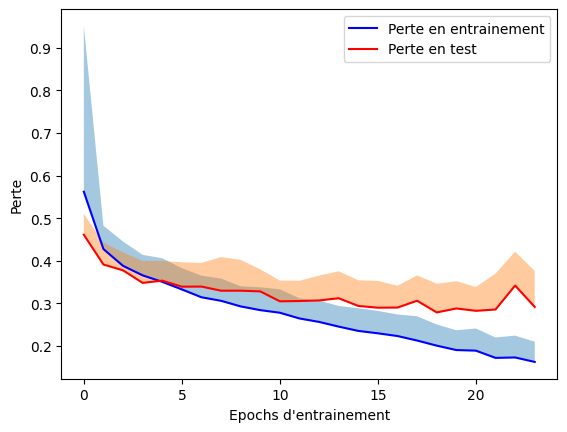

In [26]:
# visualization of result and discution
display_graph_learning(hist_train_loss[:, 0], hist_val_loss[:, 0], hist_train_loss[:, 1], hist_val_loss[:, 1], "")

In [27]:
matrix, all_score, roc_plot = scores(y_true, y)
all_score

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,0.872518,0.101005,0.8843,0.896404,0.898995,0.898679


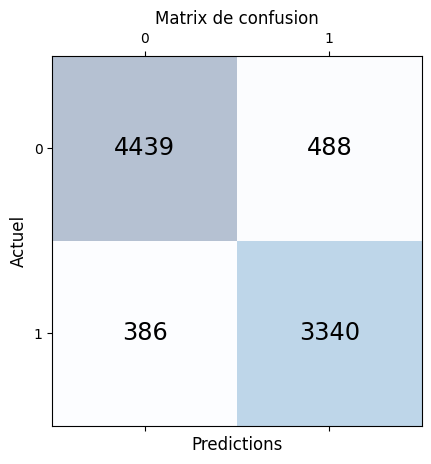

In [28]:
display_matrix_coffusion(matrix)

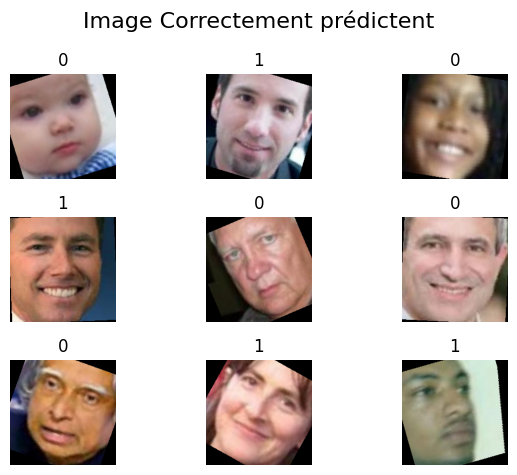

In [29]:
if len(results2044['images_correct']) >= 9:
    grid_image_data_set(results2044['images_correct'][:9], results2044['label_correct'][:9], "Image Correctement prédictent")

In [30]:
if len(results2044['images_incorrect']) >= 9:
    grid_image_data_set(results2044['images_incorrect'][:9], results2044['label_incorrect'][:9], "Image Incorrectement prédictent")

## Classifier 45+

In [31]:
faceDataset_range45 = FaceDataset(preprocess(), is_group_network=True, group_rng=3)

#### Entrainement

In [32]:
# make training
# save model
batch_size=128
learning_rate=1e-4

criterion = nn.BCELoss()

 
model = CustomVGGPytorch()

optimizer = Adam(params=model.parameters(), lr=learning_rate)


train_loader = DataLoader(faceDataset_range45, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(faceDataset_range45, batch_size=batch_size, sampler=validation_sampler)
test_loader = DataLoader(faceDataset_range45, batch_size=batch_size, sampler=test_sampler)

model, hist_train_loss, hist_val_loss, _ = training(model, 30, criterion=criterion, optimizer=optimizer, is_classification=True, is_binary=True, train_loader=train_loader, validation_loader=validation_loader, patient=4, do_save=True, DEVICE='cuda', file_name='custom_vgg_45')

Training process epoch 1/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 1/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 1/30, train loss 0.529974, valiation loss 0.356771, socres => Accuracy:0.8465761340652991, F1-Score0.64
 
[-] epoch 1/30, train loss 0.529974
 
Training process epoch 2/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 2/30


100%|██████████| 55/55 [00:19<00:00,  2.87it/s]


[-] epoch 2/30, train loss 0.312313, valiation loss 0.318141, socres => Accuracy:0.8657902340364056, F1-Score0.7011900932775812
 
[-] epoch 2/30, train loss 0.312313
 
Training process epoch 3/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 3/30


100%|██████████| 55/55 [00:20<00:00,  2.75it/s]


[-] epoch 3/30, train loss 0.286530, valiation loss 0.282808, socres => Accuracy:0.8800924588269287, F1-Score0.7425558312655086
 
[-] epoch 3/30, train loss 0.286530
 
Training process epoch 4/30


100%|██████████| 217/217 [01:56<00:00,  1.87it/s]


Test process 4/30


100%|██████████| 55/55 [00:19<00:00,  2.79it/s]


[-] epoch 4/30, train loss 0.256215, valiation loss 0.255041, socres => Accuracy:0.88904940768564, F1-Score0.7938808373590981
 
[-] epoch 4/30, train loss 0.256215
 
Training process epoch 5/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 5/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 5/30, train loss 0.237323, valiation loss 0.246593, socres => Accuracy:0.8985842242126553, F1-Score0.8025871766029247
 
[-] epoch 5/30, train loss 0.237323
 
Training process epoch 6/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 6/30


100%|██████████| 55/55 [00:20<00:00,  2.70it/s]


[-] epoch 6/30, train loss 0.225771, valiation loss 0.215486, socres => Accuracy:0.9066743715689107, F1-Score0.8174109666478236
 
[-] epoch 6/30, train loss 0.225771
 
Training process epoch 7/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 7/30


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]


[-] epoch 7/30, train loss 0.211408, valiation loss 0.207004, socres => Accuracy:0.9082635076567466, F1-Score0.8176859029572207
 
[-] epoch 7/30, train loss 0.211408
 
Training process epoch 8/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 8/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 8/30, train loss 0.201674, valiation loss 0.212411, socres => Accuracy:0.9060965039006068, F1-Score0.8106060606060606
 
[-] epoch 8/30, train loss 0.201674
 
Training process epoch 9/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 9/30


100%|██████████| 55/55 [00:19<00:00,  2.84it/s]


[-] epoch 9/30, train loss 0.187903, valiation loss 0.215732, socres => Accuracy:0.9128864490031783, F1-Score0.8402649006622517
 
[-] epoch 9/30, train loss 0.187903
 
Training process epoch 10/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 10/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 10/30, train loss 0.183198, valiation loss 0.193821, socres => Accuracy:0.9205431956082057, F1-Score0.8546511627906976
 
[-] epoch 10/30, train loss 0.183198
 
Training process epoch 11/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 11/30


100%|██████████| 55/55 [00:19<00:00,  2.89it/s]


[-] epoch 11/30, train loss 0.173748, valiation loss 0.206903, socres => Accuracy:0.9107194452470384, F1-Score0.8149700598802395
 
[-] epoch 11/30, train loss 0.173748
 
Training process epoch 12/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 12/30


100%|██████████| 55/55 [00:19<00:00,  2.88it/s]


[-] epoch 12/30, train loss 0.171338, valiation loss 0.194324, socres => Accuracy:0.9248772031204854, F1-Score0.8549916341327384
 
[-] epoch 12/30, train loss 0.171338
 
Training process epoch 13/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 13/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 13/30, train loss 0.161827, valiation loss 0.188284, socres => Accuracy:0.9229991331984976, F1-Score0.8530465949820789
 
[-] epoch 13/30, train loss 0.161827
 
Training process epoch 14/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 14/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 14/30, train loss 0.151940, valiation loss 0.188968, socres => Accuracy:0.9261774053741693, F1-Score0.8583310230108123
 
[-] epoch 14/30, train loss 0.151940
 
Training process epoch 15/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 15/30


100%|██████████| 55/55 [00:19<00:00,  2.89it/s]


[-] epoch 15/30, train loss 0.147898, valiation loss 0.212414, socres => Accuracy:0.9201097948569777, F1-Score0.8349746344374814
 
[-] epoch 15/30, train loss 0.147898
 
Training process epoch 16/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 16/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 16/30, train loss 0.140356, valiation loss 0.181726, socres => Accuracy:0.9287778098815371, F1-Score0.8631695809048017
 
[-] epoch 16/30, train loss 0.140356
 
Training process epoch 17/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 17/30


100%|██████████| 55/55 [00:19<00:00,  2.85it/s]


[-] epoch 17/30, train loss 0.132194, valiation loss 0.200089, socres => Accuracy:0.9237214677838775, F1-Score0.8582930756843801
 
[-] epoch 17/30, train loss 0.132194
 
Training process epoch 18/30


100%|██████████| 217/217 [01:53<00:00,  1.90it/s]


Test process 18/30


100%|██████████| 55/55 [00:19<00:00,  2.86it/s]


[-] epoch 18/30, train loss 0.126859, valiation loss 0.209367, socres => Accuracy:0.929789078301069, F1-Score0.8682926829268293
 
[-] epoch 18/30, train loss 0.126859
 
Training process epoch 19/30


100%|██████████| 217/217 [01:54<00:00,  1.90it/s]


Test process 19/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 19/30, train loss 0.129345, valiation loss 0.201322, socres => Accuracy:0.9248772031204854, F1-Score0.8651452282157676
 
[-] epoch 19/30, train loss 0.129345
 
Training process epoch 20/30


100%|██████████| 217/217 [01:53<00:00,  1.91it/s]


Test process 20/30


100%|██████████| 55/55 [00:19<00:00,  2.81it/s]


[-] epoch 20/30, train loss 0.118659, valiation loss 0.189313, socres => Accuracy:0.930655879803525, F1-Score0.8632478632478632
 
[-] epoch 20/30, train loss 0.118659
 
Training process epoch 21/30


100%|██████████| 217/217 [01:54<00:00,  1.89it/s]


Test process 21/30


100%|██████████| 55/55 [00:23<00:00,  2.36it/s]


[-] epoch 21/30, train loss 0.113457, valiation loss 0.177268, socres => Accuracy:0.9357122219011846, F1-Score0.8773766877927804
 
[-] epoch 21/30, train loss 0.113457
 


#### Test

In [33]:
# make test
results45, y, y_true = testing(model=model, criterion=criterion, is_binary=True, test_validation=test_loader, DEVICE='cuda')

Test: 100%|██████████| 68/68 [00:29<00:00,  2.34it/s]

[-] Test loss 0.174347


#### Display result and discussion  

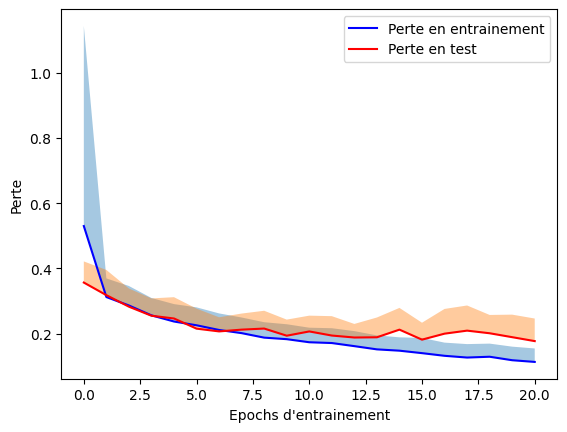

In [34]:
# visualization of result and discution
display_graph_learning(hist_train_loss[:, 0], hist_val_loss[:, 0], hist_train_loss[:, 1], hist_val_loss[:, 1], "")

In [35]:
matrix, all_score, roc_plot = scores(y_true, y)
all_score

,precision,error,f1-score,recall,accuracy,roc_auc_score
0,0.896739,0.063908,0.877465,0.859002,0.936092,0.911543


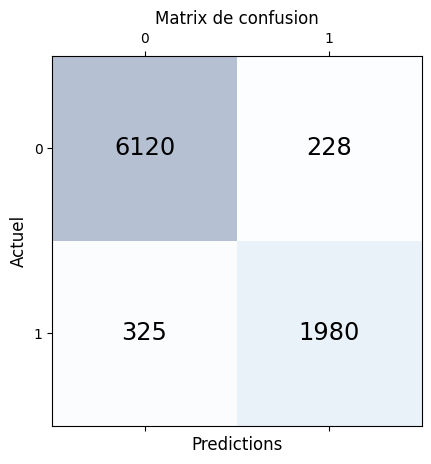

In [36]:
display_matrix_coffusion(matrix)

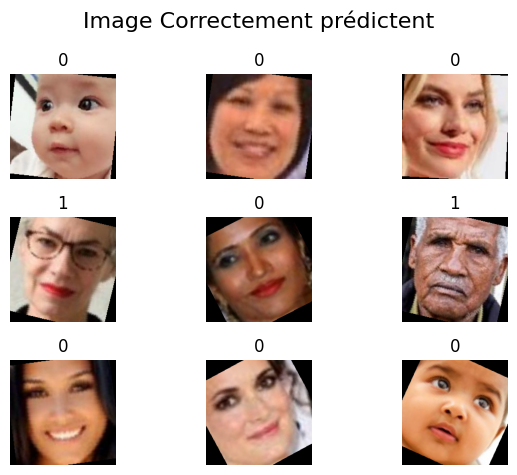

In [37]:
if len(results45['images_correct']) >= 9:
    grid_image_data_set(results45['images_correct'][:9], results45['label_correct'][:9], "Image Correctement prédictent")

In [38]:
if len(results45['images_incorrect']) >= 9:
    grid_image_data_set(results45['images_incorrect'][:9], results45['label_incorrect'][:9], "Image Incorrectement prédictent")